# Non Graded Challenge 11 - Descriptive Statistics

In [180]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [181]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')

In [182]:
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

Before we start to measure *the central tendency and the variance* of the data, We will classify the data by its location level first.

In [184]:
df_country = df[df['Location Level'] == 'Country']
df_country

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
5,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.00,1.00
9,3/4/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.00,1.00
13,3/5/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.00,1.00
18,3/6/2020,IDN,Indonesia,2,0,0,2,4,0,0,...,-0.789275,0.01,0.02,0.00,0.00,0.00,0.00%,0.00%,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21637,11/29/2021,IDN,Indonesia,176,11,419,-254,4256112,143819,4104333,...,-0.789275,0.66,16049.56,0.04,542.33,54.23,3.38%,96.43%,0.67,11.00
21670,11/30/2021,IDN,Indonesia,297,11,324,-38,4256409,143830,4104657,...,-0.789275,1.12,16050.68,0.04,542.38,54.24,3.38%,96.43%,1.69,1.00
21703,12/1/2021,IDN,Indonesia,278,10,307,-39,4256687,143840,4104964,...,-0.789275,1.05,16051.73,0.04,542.41,54.24,3.38%,96.44%,0.94,0.91
21735,12/2/2021,IDN,Indonesia,311,10,388,-87,4256998,143850,4105352,...,-0.789275,1.17,16052.91,0.04,542.45,54.25,3.38%,96.44%,1.12,1.00


In [185]:
df_province = df[df['Location Level'] == 'Province']
df_province

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.0,1.0
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.0,1.0
6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,1,1,8,...,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,800.00%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21753,12/2/2021,ID-SG,Sulawesi Tenggara,3,0,0,3,20160,527,19583,...,-4.124689,1.14,7649.52,0.00,199.97,20.00,2.61%,97.14%,NaN,1.0
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.0,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.0,1.0


## Measure of Central Tendency Data

Mathematically central tendency means measuring the center or distribution of location of values of a data set. It gives an idea of the average value of the data in the data set and also an indication of how widely the values are spread in the data set. That in turn helps in evaluating the chances of a new input fitting into the existing data set and hence probability of success.

There are three main measures of central tendency which can be calculated using the methods in pandas python library.
- Mean - It is the Average value of the data which is a division of sum of the values with the number of values.
- Median - It is the middle value in distribution when the values are arranged in ascending or descending order.
- Mode - It is the most commonly occurring value in a distribution.

### *Mean* 

**This is calculated as the sum of the values in the dataset, divided by the number of observations in the dataset.** When the dataset consists of the full population, the mean is represented by the Greek symbol ***&mu;*** (*mu*), and the formula is written like this:

$$
\begin{equation}\mu = \frac{\displaystyle\sum_{i=1}^{N}X_{i}}{N}\end{equation}
$$

We will calculate the mean of *Total Cases, Total Deaths, Total Recovered, Total Active Cases*.

**Country Data**

In [186]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_country[col].name + ' mean ' + str(df_country[col].mean()))

New Cases mean 6631.219626168225
New Deaths mean 224.0778816199377
New Recovered mean 6395.140186915888
New Active Cases mean 12.001557632398754


**Provinces Data**

In [187]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_province[col].name + ' mean ' + str(df_province[col].mean()))

New Cases mean 201.58706255623432
New Deaths mean 6.809916181275749
New Recovered mean 194.35667945257376
New Active Cases mean 0.42046692238480843


### *Median*

**To calculate the median, we need to sort the values into ascending order and then find the middle-most value.** When there are an odd number of observations, you can find the position of the median value using this formula (where *n* is the number of observations):

$$
\begin{equation}\frac{n+1}{2}\end{equation}
$$

**Country Data**

In [188]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_country[col].name + ' median ' + str(df_country[col].median()))

New Cases median 4070.5
New Deaths median 112.0
New Recovered median 3855.0
New Active Cases median 118.5


**Provinces Data**

In [189]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_province[col].name + ' median ' + str(df_province[col].median()))

New Cases median 38.0
New Deaths median 1.0
New Recovered median 29.0
New Active Cases median 0.0


### *Mode*

Another related statistic is the mode, which indicates the most frequently occurring value. If you think about it, this is potentially a good indicator of how much a student might expect to earn when they graduate from the school; out of all the salaries that are being earned by former students, the mode is earned by more than any other.

**Country Data**

In [190]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_country[col].name + ' mode ' + str(df_country[col].mode()))

New Cases mode 0    0
Name: New Cases, dtype: int64
New Deaths mode 0    0
Name: New Deaths, dtype: int64
New Recovered mode 0    0
Name: New Recovered, dtype: int64
New Active Cases mode 0    0
Name: New Active Cases, dtype: int64


**Provinces Data**

In [191]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_province[col].name + ' mode ' + str(df_province[col].mode()))

New Cases mode 0    0
Name: New Cases, dtype: int64
New Deaths mode 0    0
Name: New Deaths, dtype: int64
New Recovered mode 0    0
Name: New Recovered, dtype: int64
New Active Cases mode 0    0
Name: New Active Cases, dtype: int64


---

## Measure of Variance Data

We can see from the distribution plots of our data that the values in our dataset can vary quite widely. We can use various measures to quantify this variance.

### *Range*

A simple way to quantify the variance in a dataset is to identify the **difference between the lowest and highest values**. This is called the range, and is calculated by **subtracting the minimim value from the maximum value**.

**Country Data**

In [192]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_country[col].name + ' range: ' + str(df_country[col].max() - df_country[col].min()))

New Cases range: 56757
New Deaths range: 2069
New Recovered range: 48832
New Active Cases range: 62451


**Provinces Data**

In [193]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_province[col].name + ' range: ' + str(df_province[col].max() - df_province[col].min()))

New Cases range: 14622
New Deaths range: 544
New Recovered range: 20602
New Active Cases range: 25334


### *Percentiles and Quartiles*

The range is easy to calculate, but it's not a particularly useful statistic. For example, a range of 4257241 between the lowest and highest total cases does not tell us which value within that range a case is most likely a lot - it doesn't tell us nothing about how the cases are distributed around the mean within that range.

#### Percentiles

A percentile tells us where a given value is ranked in the overall distribution. For example, 25% of the data in a distribution has a value lower than the 25th percentile; 75% of the data has a value lower than the 75th percentile, and so on. Note that half of the data has a value lower than the 50th percentile - so the 50th percentile is also the median!

In [194]:
print(stats.percentileofscore(df_country['New Cases'], df_country['New Cases'].mean(), 'strict'))

73.98753894080997


So this mean of new cases is at the 73.9th percentile of total new case data.

#### Quartile

Rather than using individual percentiles to compare data, we can consider the overall spread of the data by dividing those percentiles into four quartiles. The first quartile contains the values from the minimum to the 25th percentile, the second from the 25th percentile to the 50th percentile (which is the median), the third from the 50th percentile to the 75th percentile, and the fourth from the 75th percentile to the maximum.

**Country Data**

In [195]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print('Country ' + df_country[col].name + ' quartile:\n' + str(df_country[col].quantile([0.25, 0.5, 0.75])))

Country New Cases quartile:
0.25    1044.25
0.50    4070.50
0.75    6737.75
Name: New Cases, dtype: float64
Country New Deaths quartile:
0.25     47.25
0.50    112.00
0.75    193.75
Name: New Deaths, dtype: float64
Country New Recovered quartile:
0.25     889.75
0.50    3855.00
0.75    6976.75
Name: New Recovered, dtype: float64
Country New Active Cases quartile:
0.25   -619.75
0.50    118.50
0.75    639.75
Name: New Active Cases, dtype: float64


**Provinces Data**

In [196]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print('All Provinces ' + df_province[col].name + ' quartile:\n' + str(df_province[col].quantile([0.25, 0.5, 0.75])))

All Provinces New Cases quartile:
0.25      6.0
0.50     38.0
0.75    133.0
Name: New Cases, dtype: float64
All Provinces New Deaths quartile:
0.25    0.0
0.50    1.0
0.75    4.0
Name: New Deaths, dtype: float64
All Provinces New Recovered quartile:
0.25      4.0
0.50     29.0
0.75    126.0
Name: New Recovered, dtype: float64
All Provinces New Active Cases quartile:
0.25   -15.0
0.50     0.0
0.75    25.0
Name: New Active Cases, dtype: float64


### *Box Plot & Outliers*

**An outlier is a value that is so far from the center of the distribution compared to other values that it skews the distribution by affecting the mean.** There are all sorts of reasons that you might have outliers in your data, including data entry errors, failures in sensors or data-generating equipment, or genuinely anomalous values.

Its usually easier to understand how data is distributed across the quartiles by visualizing it. We can use a histogram, but many data scientists use a kind of visualization called a box plot (or a box and whiskers plot).

**Country Data**

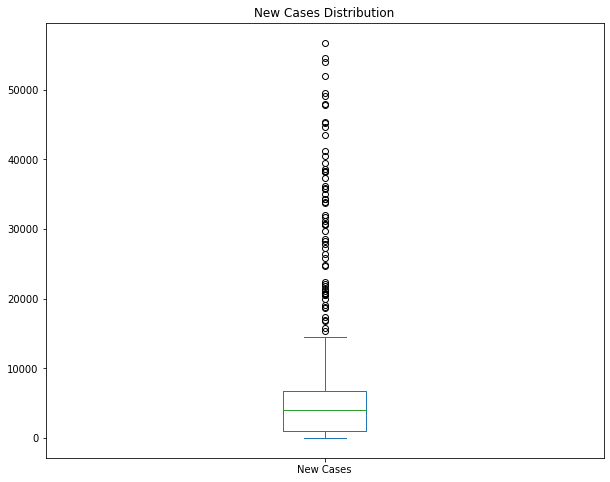

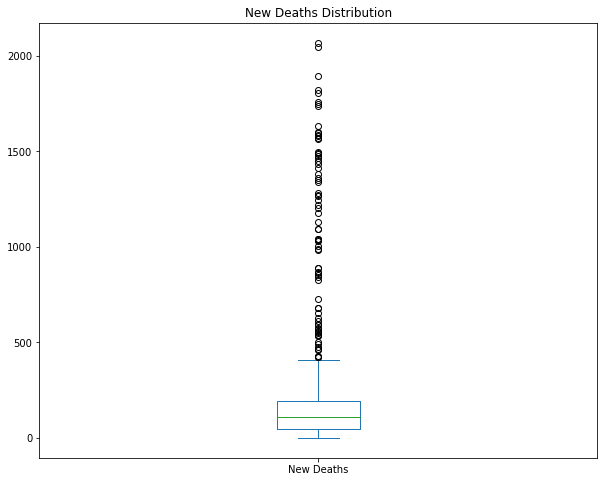

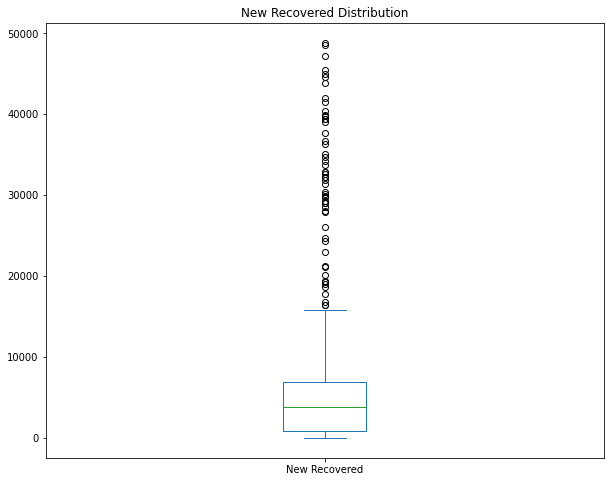

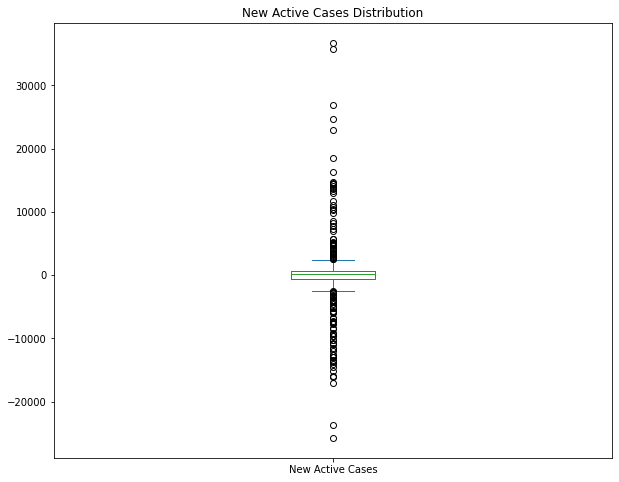

In [197]:
# Plot a box-whisker chart
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    df_country[col].plot(kind='box', title= col + ' Distribution', figsize=(10,8))
    plt.show()

**Provinces Data**

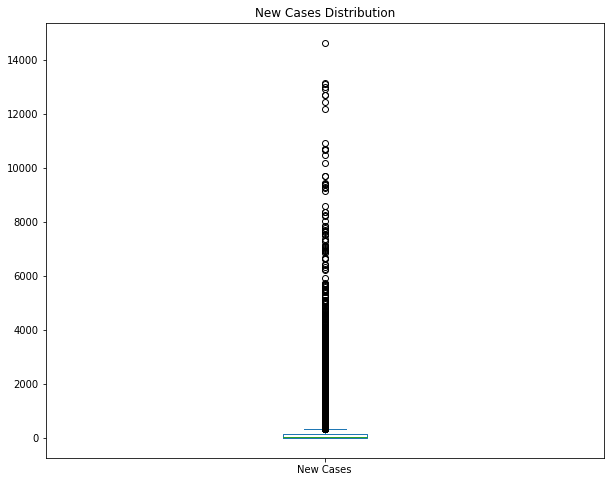

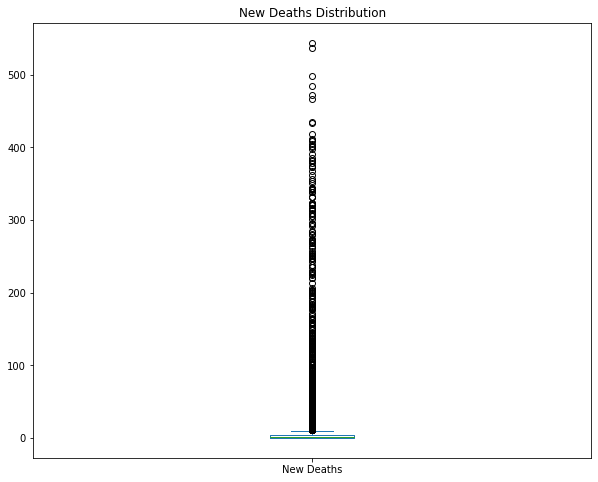

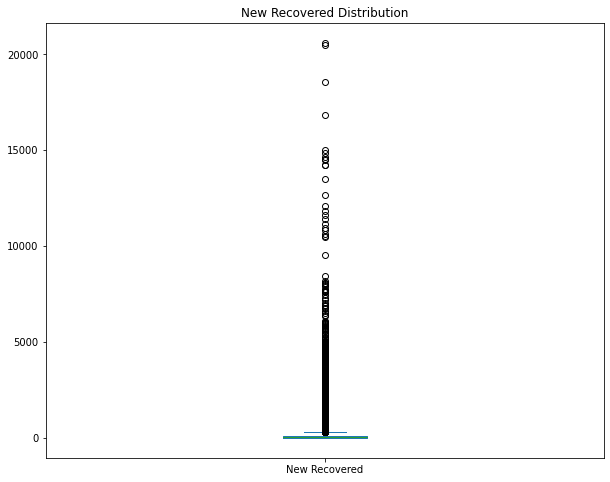

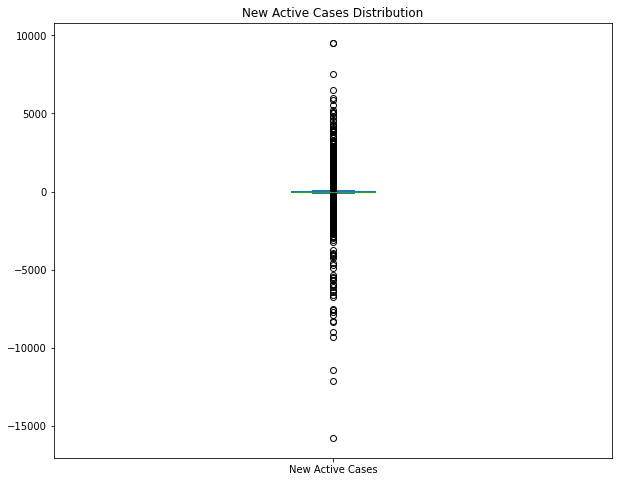

In [198]:
# Plot a box-whisker chart
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    df_province[col].plot(kind='box', title= col + ' Distribution', figsize=(10,8))
    plt.show()

The box plot consists of:
- A rectangular *box* that shows where the data between the 25th and 75th percentile (the second and third quartile) lie. This part of the distribution is often referred to as the *interquartile range* - it contains the middle 50 data values.
- *Whiskers* that extend from the box to the bottom of the first quartile and the top of the fourth quartile to show the full range of the data.
- A line in the box that shows that location of the median (the 50th percentile, which is also the threshold between the second and third quartile)

### *Variance and Standard Deviation*
We've seen how to understand the *spread* of our data distribution using the range, percentiles, and quartiles; and we've seen the effect of outliers on the distribution. Now it's time to look at how to measure the amount of variance in the data.

#### Variance

Variance is measured as the average of the squared difference from the mean. For a full population, it's indicated by a squared Greek letter *sigma* (***&sigma;<sup>2</sup>***) and calculated like this:

$$
\begin{equation}\sigma^{2} = \frac{\displaystyle\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}\end{equation}
$$

For a sample, it's indicated as ***s<sup>2</sup>*** calculated like this:

$$
\begin{equation}s^{2} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n-1}\end{equation}
$$

In both cases, we sum the difference between the individual data values and the mean and square the result. Then, for a full population we just divide by the number of data items to get the average. When using a sample, we divide by the total number of items **minus 1** to correct for sample bias.

**Country Data**

In [199]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_country[col].name + ' variance ' + str(df_country[col].var()))

New Cases variance 91317496.64279674
New Deaths variance 129498.14369098129
New Recovered variance 81942317.0411594
New Active Cases variance 23641740.444615353


**Provinces Data**

In [200]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_province[col].name + ' variance ' + str(df_province[col].var()))

New Cases variance 442764.809110887
New Deaths variance 703.514538906594
New Recovered variance 495785.7801425631
New Active Cases variance 187398.98786106252


#### Standard Deviation

To calculate the variance, we squared the difference of each value from the mean. If we hadn't done this, the numerator of our fraction would always end up being zero (because the mean is at the center of our values). However, this means that the variance is not in the same unit of measurement as our data - in our case, since we're calculating the variance for New Cases, New Deaths, etc., it's in number of cases squared; which is not very helpful.

To get the measure of variance back into the same unit of measurement, we need to find its square root:

$$
\begin{equation}s = \sqrt{91317496} \approx 9556\end{equation}
$$

So what does this value represent?

It's the *standard deviation* for our grades data. More formally, it's calculated like this for a full population:

$$
\begin{equation}\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}}\end{equation}
$$

Or like this for a sample:

$$
\begin{equation}s = \sqrt{\frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n-1}}\end{equation}
$$

Note that in both cases, it's just the square root of the corresponding variance forumla!

**Country Data**

In [201]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_country[col].name + ' standard deviation ' + str(df_country[col].std()))

New Cases standard deviation 9556.018869947711
New Deaths standard deviation 359.85850509746365
New Recovered standard deviation 9052.199569229537
New Active Cases standard deviation 4862.277289975897


**Provinces Data**

In [202]:
numcols = ['New Cases', 'New Deaths', 'New Recovered', 'New Active Cases']
for col in numcols:
    print(df_province[col].name + ' standard deviation ' + str(df_province[col].std()))

New Cases standard deviation 665.4057477290731
New Deaths standard deviation 26.523848493508517
New Recovered standard deviation 704.1205721625829
New Active Cases standard deviation 432.8960474075301
